# Notebook 3 - Running BiG-SCAPE

`Created at 13-May-2020`

This notebook helps to run BiG-SCAPE for the annotated genomes


In [1]:
import pandas as pd
import glob
import os
import subprocess
import re
# from Bio import SeqIO
import numpy as np
import networkx
from networkx.algorithms.components.connected import connected_components
from collections import defaultdict
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Downloading antiSMASH BGCs**

```bash
cd ./ncbi_antismash/nf_output/
wget https://dl.secondarymetabolites.org/mibig/mibig_gbk_2.0.tar.gz
tar xvzf mibig_gbk_2.0.tar.gz
rm mibig_gbk_2.0.tar.gz
```

**Running BiG-SCAPE**

```bash
python /home/jovyan/jupyterdata/tiago/dorrestein_nuno/bigscape/BiG-SCAPE/bigscape.py \
-i /home/jovyan/jupyterdata/tiago/cyanobiome/ncbi_antismash/nf_output/ \
-o /home/jovyan/jupyterdata/tiago/cyanobiome/bigscape_outputs/ \
-c 12 --include_singletons --pfam_dir /home/jovyan/jupyterdata/tiago/dorrestein_nuno/bigscape/
```

**Gathering BiG-SCAPE Results**

In [162]:
# %%bash

# cd ./bigscape_outputs/

# rm ./bigscape_all_c030.txt
# find ./network_files/2020-05-16_22-19-49_hybrids_glocal/ -type f -name *_c0.30.network | cat > ./network_files.txt
# while read line; do cat $line >> ./pre_bigscape_all_c030.txt; done < ./network_files.txt
# awk '/Clustername/&&c++>0 {next} 1' ./pre_bigscape_all_c030.txt >> ./bigscape_all_c030.txt

In [2]:
def get_bigscape_df(input_file):
    bigscape_df = pd.read_csv(input_file,sep='\t')
    bigscape_df.rename(columns=lambda x: re.sub(' ','_',x), inplace=True)
    bigscape_df = bigscape_df[bigscape_df.Clustername_1 != bigscape_df.Clustername_2]
    bigscape_df.reset_index(inplace=True,drop=True)
    return bigscape_df

bigscape_df = get_bigscape_df("./bigscape_outputs/bigscape_all_c030.txt")

bigscape_df[:15]

,Clustername_1,Clustername_2,Raw_distance,Squared_similarity,Jaccard_index,DSS_index,Adjacency_index,raw_DSS_non-anchor,raw_DSS_anchor,Non-anchor_domains,Anchor_domains,Combined_group,Shared_group
0,PXPV01000027.1.region001,PXPY01000236.1.region001,1.151247e-01,0.783004,1.000000,0.884260,0.857143,0.115740,0.000000,12,0,siderophore - siderophore,siderophore
1,AJLL01000049.1.region001,NGZT01000062.1.region001,3.344156e-02,0.934235,0.928571,0.969697,0.833333,0.058824,0.000000,17,4,hglE-KS.resorcinol - hglE-KS.resorcinol,hglE-KS.resorcinol
2,PXPM01000050.1.region001,PXQG01000022.1.region001,1.482445e-01,0.725487,0.777778,0.860708,0.454545,0.139292,0.000000,10,0,siderophore - siderophore,siderophore
3,QOPQ01000007.1.region001,c00035_gi1022...region001,2.672404e-01,0.536937,0.947368,0.728130,0.850000,0.271870,0.000000,24,0,terpene.bacteriocin - terpene.bacteriocin,terpene.bacteriocin
4,NHDT02000030.1.region001,SHBU01000008.1.region001,2.791878e-01,0.519570,0.875000,0.716412,0.857143,0.283588,0.000000,7,0,terpene.bacteriocin - terpene.bacteriocin,terpene.bacteriocin
5,PXPP01000028.1.region001,PXQA01000117.1.region001,2.032639e-01,0.634788,0.900000,0.797104,0.727273,0.202896,0.000000,12,0,siderophore - siderophore,siderophore
6,BGC.region0001153,BGC.region0001192,6.513167e-02,0.873979,1.000000,0.932854,1.000000,0.066389,0.067343,25,24,unknown - unknown,unknown
7,NJHY01000006.1.region001,NJHZ01000030.1.region001,1.734723e-17,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,29,2,arylpolyene - arylpolyene,arylpolyene
8,AJLN01000037.1.region001,NMQH01000127.1.region001,1.905109e-01,0.655273,0.461538,0.821785,0.387097,0.173386,0.181836,12,4,hglE-KS.resorcinol - hglE-KS.resorcinol,hglE-KS.resorcinol
9,SHBU01000008.1.region001,UCNJ01000010.1.region001,2.219777e-01,0.605319,0.894737,0.778133,0.714286,0.221867,0.000000,22,0,terpene.bacteriocin - terpene.bacteriocin,terpene.bacteriocin


In [3]:
sim_col = []

for i,r in bigscape_df.iterrows():
    similarity = 1 - float(bigscape_df['Raw_distance'].loc[i])
    sim_col.append(similarity)

bigscape_df['Raw_distance'] = sim_col
bigscape_df.rename(columns={'Raw_distance':'Similarity'}, inplace=True)

bigscape_df[:5]

,Clustername_1,Clustername_2,Similarity,Squared_similarity,Jaccard_index,DSS_index,Adjacency_index,raw_DSS_non-anchor,raw_DSS_anchor,Non-anchor_domains,Anchor_domains,Combined_group,Shared_group
0,PXPV01000027.1.region001,PXPY01000236.1.region001,0.884875,0.783004,1.000000,0.884260,0.857143,0.115740,0.0,12,0,siderophore - siderophore,siderophore
1,AJLL01000049.1.region001,NGZT01000062.1.region001,0.966558,0.934235,0.928571,0.969697,0.833333,0.058824,0.0,17,4,hglE-KS.resorcinol - hglE-KS.resorcinol,hglE-KS.resorcinol
2,PXPM01000050.1.region001,PXQG01000022.1.region001,0.851755,0.725487,0.777778,0.860708,0.454545,0.139292,0.0,10,0,siderophore - siderophore,siderophore
3,QOPQ01000007.1.region001,c00035_gi1022...region001,0.732760,0.536937,0.947368,0.728130,0.850000,0.271870,0.0,24,0,terpene.bacteriocin - terpene.bacteriocin,terpene.bacteriocin
4,NHDT02000030.1.region001,SHBU01000008.1.region001,0.720812,0.519570,0.875000,0.716412,0.857143,0.283588,0.0,7,0,terpene.bacteriocin - terpene.bacteriocin,terpene.bacteriocin


**Replacing Names**

In [4]:
def parse_gbk_list(folder_list):
    gbk_list,new_name_list = [],[]
    for antismash_folder in folder_list:
        print("Parsing BGCs from folder %s"%antismash_folder)
        for root, dirs, files in os.walk(antismash_folder):
            count = 1
            for file in sorted(files):
                if file.endswith(".gbk"):
                    if 'region' in file:
                        if 'BGC' in file:
                            new_name = file.rstrip('.gbk')
                            new_name_list.append(new_name)
                            gbk_list.append(file.rstrip('.gbk'))
                        else:
                            strain_name = os.path.basename(os.path.normpath(root)).split('.')[0]
                            gbk_list.append(file.rstrip('.gbk'))
                            new_name = strain_name + '.region' + "{0:0=3d}".format(count)
                            count += 1
                            new_name_list.append(new_name)
    return gbk_list,new_name_list

folder_list = ["/home/jovyan/jupyterdata/tiago/cyanobiome/ncbi_antismash/nf_output/"]

gbk_list,new_name_list = parse_gbk_list(folder_list)

Parsing BGCs from folder /home/jovyan/jupyterdata/tiago/cyanobiome/ncbi_antismash/nf_output/


In [5]:
len(gbk_list),len(new_name_list)

(14380, 14380)

In [6]:
name_dict = dict(zip(gbk_list, new_name_list))
new_col1, new_col2 = [],[]

for i,r in bigscape_df.iterrows():
    new_col1.append(name_dict[bigscape_df['Clustername_1'].loc[i]])
    new_col2.append(name_dict[bigscape_df['Clustername_2'].loc[i]])
    
bigscape_df['Clustername_1'] = new_col1
bigscape_df['Clustername_2'] = new_col2

bigscape_df[:15]

,Clustername_1,Clustername_2,Similarity,Squared_similarity,Jaccard_index,DSS_index,Adjacency_index,raw_DSS_non-anchor,raw_DSS_anchor,Non-anchor_domains,Anchor_domains,Combined_group,Shared_group
0,PXPV01.region001,PXPY01.region007,0.884875,0.783004,1.000000,0.884260,0.857143,0.115740,0.000000,12,0,siderophore - siderophore,siderophore
1,AJLL01.region005,NGZT01.region008,0.966558,0.934235,0.928571,0.969697,0.833333,0.058824,0.000000,17,4,hglE-KS.resorcinol - hglE-KS.resorcinol,hglE-KS.resorcinol
2,PXPM01.region001,PXQG01.region001,0.851755,0.725487,0.777778,0.860708,0.454545,0.139292,0.000000,10,0,siderophore - siderophore,siderophore
3,QOPQ01.region002,LVHK01.region009,0.732760,0.536937,0.947368,0.728130,0.850000,0.271870,0.000000,24,0,terpene.bacteriocin - terpene.bacteriocin,terpene.bacteriocin
4,NHDT02.region001,SHBU01.region004,0.720812,0.519570,0.875000,0.716412,0.857143,0.283588,0.000000,7,0,terpene.bacteriocin - terpene.bacteriocin,terpene.bacteriocin
5,PXPP01.region002,PXQA01.region004,0.796736,0.634788,0.900000,0.797104,0.727273,0.202896,0.000000,12,0,siderophore - siderophore,siderophore
6,BGC.region0001153,BGC.region0001192,0.934868,0.873979,1.000000,0.932854,1.000000,0.066389,0.067343,25,24,unknown - unknown,unknown
7,NJHY01.region002,NJHZ01.region004,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,29,2,arylpolyene - arylpolyene,arylpolyene
8,AJLN01.region002,NMQH01.region007,0.809489,0.655273,0.461538,0.821785,0.387097,0.173386,0.181836,12,4,hglE-KS.resorcinol - hglE-KS.resorcinol,hglE-KS.resorcinol
9,SHBU01.region004,UCNJ01.region010,0.778022,0.605319,0.894737,0.778133,0.714286,0.221867,0.000000,22,0,terpene.bacteriocin - terpene.bacteriocin,terpene.bacteriocin


**Obtaining Gene Cluster Families**

In [7]:
def get_neighbors(target,dataframe,column1,column2):
    subset1 = dataframe[(dataframe[column1]==target)]
    subcat = subset1.append(dataframe[(dataframe[column2]==target)])
    temp_list = []
    for index,row in subcat.iterrows():
        temp_list.append(subcat[column1][index])
        temp_list.append(subcat[column2][index])
    temp_list = list(np.unique(temp_list))
    return temp_list

def to_edges(l):
    '''This function convert a list of group of nodes into edges
    Script adapted from https://stackoverflow.com/questions/4842613/merge-lists-that-share-common-elements/4842783
    '''
    it = iter(l)
    last = next(it)
    for current in it:
        yield last, current
        last = current

def to_graph(l):
    '''This function generate a graph using a list of group of nodes and the edges create with the function to_edges()
    Script adapted from https://stackoverflow.com/questions/4842613/merge-lists-that-share-common-elements/4842783
    '''
    G = networkx.Graph()
    for part in l:
        G.add_nodes_from(part)
        G.add_edges_from(to_edges(part))
    return G

def get_family_dict(components_list,dataframe,dictionary):
    count = 0
    for family in list(components_list):
        count += 1
        for fam_member in family:
            dictionary['GCF%s'%count].append(fam_member)
    return dictionary

def main_get_families(input_file,bigscape_df):
    targets_list = np.unique([bigscape_df.Clustername_1,bigscape_df.Clustername_2])
    neighbors_list = []
    for target in targets_list:
        neighbors_list.append(get_neighbors(target,bigscape_df,'Clustername_1','Clustername_2'))
    G = to_graph(neighbors_list)
    C = connected_components(G)
    gcf_dict = defaultdict(list)
    gcf_dict = get_family_dict(C,bigscape_df,gcf_dict)
    return gcf_dict

In [ ]:
gcf_dict = main_get_families('./bigscape_outputs/bigscape_all_c030.txt',bigscape_df)

In [ ]:
gcf_dict

In [ ]:
cluster_list = []
strains = []

for item in gcf_dict.values():
    cluster_list = cluster_list + item

for item in cluster_list:
    if 'BGC' in item[:3]:
        strains.append('MIBiG')
    else:
        strains.append(item.split('.')[0])

col_names = list(np.unique(strains))

col_names.remove('')

col_names

In [ ]:
family_rows = []
indexes = []

for key,value in gcf_dict.items():
    indexes.append(key)
    row = []
    for strain in col_names:
        if strain == "MIBiG":
            find_substring_in_list = [s for s in value if "BGC" in s]
            sublist = filter(lambda x: "BGC" in x, value)
            sublist = list(sublist)
        else:
            find_substring_in_list = [s for s in value if strain.lower() in s.lower()] # .lower() for case insensitive
            sublist = filter(lambda x: strain in x, value)
            sublist = list(sublist)
            for item in find_substring_in_list:
                if 'BGC' in item[:3]:
                    find_substring_in_list.remove(item)
                    sublist.remove(item)
        if find_substring_in_list:
            row.append(sublist)
        else:
            row.append(0)
    family_rows.append(row)
    
gcf_patterns = pd.DataFrame(family_rows,columns=col_names,index=indexes)

In [ ]:
family_counts = []

for i,r in gcf_patterns.iterrows():
    new_row = []
    for item in r:
        if item == 0:
            new_row.append(0)
        else:
            new_row.append(1)
    family_counts.append(new_row)
    
gcf_binary = pd.DataFrame(family_counts,columns=col_names,index=indexes)

gcf_binary[:5]

In [ ]:
from scipy.spatial import distance
from scipy.cluster import hierarchy
import seaborn as sns
from skbio.diversity import beta_diversity
import matplotlib.pyplot as plt
sns.set()
#sns.set_context("talk")
%matplotlib inline

header = list(gcf_binary.columns.values)
# gcf_binary.index.names = ['GCFs']

ids = gcf_binary.columns.astype(str).tolist()
# data = gcf_binary.as_matrix()
data = gcf_binary[col_names].values
data = data.transpose()
data = data.astype(int)

bc_dm = beta_diversity('jaccard', data, ids)
bc_dm_df = bc_dm.to_data_frame()

In [ ]:
sns.set_context("paper")

correlations = bc_dm_df.corr()
correlations_array = np.asarray(bc_dm_df.corr())

row_linkage = hierarchy.linkage(distance.pdist(correlations_array), method='average')

col_linkage = hierarchy.linkage(distance.pdist(correlations_array.T), method='average')

palette = sns.cubehelix_palette(10)

sns.clustermap(correlations, row_linkage=row_linkage, col_linkage=col_linkage,
               figsize=(13, 13),standard_scale=1,cmap=palette)

print("Jaccard Similarity (0.0-1.0):")

# plt.savefig("./big-scape/outputs/beta-diversity_%s.png"%(int(cutoff*10)),format="png")

In [ ]:
sns.set(color_codes=True)

fig = plt.figure()
diversity_scores = {}
matrix_data = []

for i,r in bc_dm_df.iterrows():
    diversity_scores[i] = np.average(bc_dm_df[i]),np.std(bc_dm_df[i])
    matrix_data.append(r.values.tolist())

# ax = sns.tsplot(data=matrix_data, err_style="ci_bars", interpolate=False)

# plt.savefig("./big-scape/outputs/tsplot_%s.png"%(int(cutoff*10)), format='png')

In [ ]:
cyanobiome_list = ['JAAHII01','JAAHIH01','JAAHGF01','JAAHHC01','JAAHHD01','JAAHFN01','JAAHGM01','JAAHGB01','JAAHFW01','JAAHFZ01','JAAHFP01','JAAHGH01','JAAHGC01','JAAHGA01','JAAHHJ01','JAAHGO01','JAAHGU01','JAAHGW01','JAAHGS01','JAAHHM01','JAAHHP01','JAAHHN01','JAAHGL01','JAAHFU01']

In [19]:
# full Cyanobiome at NCBI
# cyanobiome_list = ['JAAHII01','JAAHIH01','JAAHGF01','JAAHHC01','JAAHHD01','JAAHFN01','JAAHGM01','JAAHGB01','JAAHFW01','JAAHFZ01','JAAHFP01','JAAHGH01','JAAHGC01','JAAHGA01','JAAHHJ01','JAAHGO01','JAAHGU01','JAAHGW01','JAAHGS01','JAAHHM01','JAAHHP01','JAAHHN01','JAAHGL01','JAAHHW01','JAAHHT01','JAAHGX01','JAAHHZ01','JAAHFU01','JAAHGI01','JAAHFV01','JAAHIG01','JAAHHG01','JAAHHS01','JAAHIA01','JAAHHE01','JAAHFY01','JAAHGE01','JAAHHX01','JAAHHR01','JAAHGY01','JAAHGQ01','JAAHIC01','JAAHFQ01','JAAHGZ01','JAAHFM01','JAAHFT01','JAAHGD01','JAAHGR01','JAAHIE01','JAAHFO01','JAAHIB01','JAAHHO01','JAAHGT01','JAAHHY01','JAAHGN01','JAAHGJ01','JAAHFR01','JAAHHU01','JAAHGK01','JAAHHL01','JAAHHQ01','JAAHHH01','JAAHID01','JAAHHK01','JAAHHF01','JAAHGG01','JAAHHV01','JAAHHI01','JAAHIF01','JAAHHB01','JAAHGV01','JAAHHA01','JAAHGP01']

In [ ]:
most_promising_color = {}

for key,value in diversity_scores.items():
    if key in cyanobiome_list:
        most_promising_color[key] = {"diversity":"cyanobiome", "subject":"Cyanobiome Sample)"}
        print(diversity_scores[key])
    else:
        if value[0] >= 0.95:
            most_promising_color[key] = {"diversity":"big_producer", "subject":"High diversity (avg. ≥ 95%)"}
        else:
            most_promising_color[key] = {"diversity":"small_producer", "subject":"Low diversity (avg. < 95%)"}
            
sample_md = pd.DataFrame.from_dict(most_promising_color, orient='index')

sample_md

In [ ]:
from skbio.stats.ordination import pcoa

bc_pc = pcoa(bc_dm)

In [ ]:
fig = bc_pc.plot(sample_md, 'subject', axis_labels=('PC 1', 'PC 2', 'PC 3'), cmap='jet', s=100)

fig.set_size_inches(20, 10)

In [ ]:
len(sample_md[sample_md['subject'] == 'high'])

In [ ]:
len(sample_md[sample_md['subject'] == 'low'])

In [ ]:
gcf_noMIBiG = gcf_binary.drop('MIBiG',axis=1)

cols_to_keep = []

for item in gcf_noMIBiG.columns:
    if item in cyanobiome_list:
        cols_to_keep.append(item)
        
heatmap_df = gcf_noMIBiG[cols_to_keep]
heatmap_df = heatmap_df[(heatmap_df.T != 0).any()]

heatmap_df

In [ ]:
metadata_df = pd.read_csv("./cyanobiome_metadata_df-TFL200507.tsv",sep='\t',index_col=0)

taxa_dict = dict(zip(metadata_df['GenomeID'],metadata_df['Taxa']))

new_cols = []

for item in heatmap_df.columns:
    new_name = taxa_dict[item] + ' sp. ' + item
    new_cols.append(new_name)
    
heatmap_df.columns = new_cols

In [ ]:
sns.clustermap(heatmap_df,row_cluster=False,figsize=(8,24))

**TODO**
```
- Add "other cyanobacteria" column to heatmap dataframe
- Make another heatmap for the rows with 0s in the "other cyanobacteria" column
```

In [141]:
subset_strains = ['Leptolyngbya sp. JAAHII01','Moorea sp. JAAHFZ01','Moorea sp. JAAHHM01']

In [143]:
subset_heatmap = heatmap_df[subset_strains]
subset_heatmap = subset_heatmap[(subset_heatmap.T != 0).any()]

index_to_keep = []

for i,r in subset_heatmap.iterrows():
    if int(r.sum()) >= 2:
        index_to_keep.append(i)
        
subset_heatmap = subset_heatmap.loc[index_to_keep]

subset_heatmap

,Leptolyngbya sp. JAAHII01,Moorea sp. JAAHFZ01,Moorea sp. JAAHHM01
GCF24,0,1,1
GCF26,0,1,1
GCF54,0,1,1
GCF59,0,1,1
GCF62,0,1,1
GCF68,0,1,1
GCF70,0,1,1
GCF72,0,1,1
GCF76,0,1,1
GCF77,0,1,1


In [51]:
gcf_noMIBiG = gcf_binary.drop('MIBiG',axis=1)
allcyanos_cols, cols_to_keep = [],[]

for item in gcf_noMIBiG.columns:
    if item in cyanobiome_list:
        cols_to_keep.append(item)
    else:
        allcyanos_cols.append(item)

gcf_noMIBiG_allcyanos = gcf_noMIBiG[allcyanos_cols]
gcf_noMIBiG_allcyanos = gcf_noMIBiG_allcyanos[(gcf_noMIBiG_allcyanos.T != 0).any()]
gcf_noMIBiG_cyanobiome = gcf_noMIBiG[cols_to_keep]
gcf_noMIBiG_cyanobiome = gcf_noMIBiG_cyanobiome[(gcf_noMIBiG_cyanobiome.T != 0).any()]

gcf_noMIBiG_allcyanos.shape,gcf_noMIBiG_cyanobiome.shape

((860, 1628), (119, 22))

In [57]:
final_cols = []

for i,r in gcf_noMIBiG_cyanobiome.iterrows():
    if i not in gcf_noMIBiG_allcyanos.index:
        final_cols.append(i)

heatmap_df = gcf_noMIBiG_cyanobiome.loc[final_cols]

heatmap_df

,JAAHFP01,JAAHFU01,JAAHFW01,JAAHFZ01,JAAHGA01,JAAHGB01,JAAHGC01,JAAHGF01,JAAHGH01,JAAHGL01,...,JAAHGS01,JAAHGU01,JAAHGW01,JAAHHC01,JAAHHD01,JAAHHJ01,JAAHHM01,JAAHHP01,JAAHIH01,JAAHII01
GCF820,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
GCF821,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
GCF822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
GCF823,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
GCF824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
GCF827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
GCF830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
GCF832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


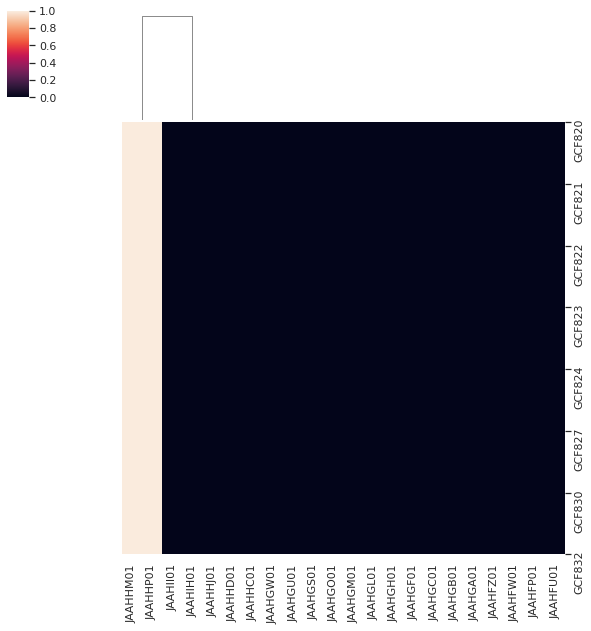

In [58]:
sns.clustermap(heatmap_df,row_cluster=False)

**Issues**

- Number of networked strains
- Heatmap_df should contain all taxa similar to our strain

In [32]:
seen = []

for i,r in bigscape_df.iterrows():
    strain1 = bigscape_df['Clustername_1'].loc[i].split('.')[0]
    strain2 = bigscape_df['Clustername_2'].loc[i].split('.')[0]
    if strain1 not in seen:
        seen.append(strain1)
    if strain2 not in seen:
        seen.append(strain2)

len(seen)

1652

In [59]:
!ls -d ./ncbi_antismash/nf_output/*/ | wc -l

1920
